In [1]:
import torch
from utils import LQR_2D_true_solution, true_V_eval_2D
from bases import bases_poly_2D_simp, d_bases_poly_2D_simp, sec_d_bases_poly_2D_simp, bases_poly_2D_s_a_simp
from main_phibe import phibe_finder_2D_LQR
from main_RL import RL_finder_2D_LQR
import matplotlib.pyplot as plt
from math import sqrt
import numpy as np

In [2]:
torch.set_default_dtype(torch.float64)
device = torch.device("cpu")

In [3]:
def reward(traj_mat, act_mat):
    # traj_mat shape: (m, I, dim)
    # act_mat shape: (m, I, dim)
    # output shape: (m, I, 1)
    r_1 = torch.einsum("ijk,kl,ijl->ij", traj_mat, Q, traj_mat)
    r_2 = torch.einsum("ijk,kl,ijl->ij", act_mat, R, act_mat)
    return (- r_1 - r_2).unsqueeze(-1)

In [14]:
beta = 0.
sig = 0.
A = torch.tensor([[-9.3750, -3.1250], [-3.1250, -9.3750]])
B = torch.tensor([[10., 1.], [1., 10.1]])
Q = torch.tensor([[10., 2.], [2., 10.4]])
R = torch.tensor([[12., 3.], [3., 8.]])

In [15]:
true_b, true_c, True_V = LQR_2D_true_solution(A, B, sig, Q, R, beta)
b_init = true_b + torch.randn(2, 2)
Q_init = 4. * torch.rand(10) - 2.
V_init = true_V_eval_2D(A, B, b_init, R, Q, beta, sig)

In [88]:
print(true_b)
print(true_c)
print(True_V)
print(V_init)

tensor([[-0.3994,  0.1253],
        [ 0.1163, -0.5850]])
tensor([[0.],
        [0.]])
tensor([ 0.0000, -0.4279,  0.0353, -0.4462])
tensor([ 0.0000, -0.4985, -0.5172, -2.0252])


In [89]:
bd_low_s = -2
bd_upper_s = 2
bd_low_b = -2
bd_upper_b = 2
reward = reward
bases_V = bases_poly_2D_simp
d_bases_V = d_bases_poly_2D_simp
sec_d_bases_V = sec_d_bases_poly_2D_simp
bases_Q = bases_poly_2D_s_a_simp
num_iter = 15
GD_num_iter = 75
m=int(1e3)
m_Q=int(1e3)
I=6
I_Q=6
lr=0.1
order = 1
true_V = True_V
info_true = {"A":A, "B":B, "sig":sig, "R":R, "Q":Q}
dt = 2.
simp_basis = True
deterministic = True
b_val_phibe, V_exact_dist_phibe_1, V = phibe_finder_2D_LQR(beta, b_init, Q_init, bd_low_s, bd_upper_s, bd_low_b, bd_upper_b, reward, simp_basis, bases_V, d_bases_V, sec_d_bases_V, bases_Q, num_iter, deterministic, "Galerkin", GD_num_iter, m, m_Q, I, lr, dt, order, true_V, info_true)

Running Optimal Phibe of order 1 using Galerkin: 100%|██████████| 15/15 [00:02<00:00,  5.13it/s]


In [90]:
bd_low_s = -2
bd_upper_s = 2
bd_low_b = -2
bd_upper_b = 2
reward = reward
bases_V = bases_poly_2D_simp
d_bases_V = d_bases_poly_2D_simp
sec_d_bases_V = sec_d_bases_poly_2D_simp
bases_Q = bases_poly_2D_s_a_simp
num_iter = 15
GD_num_iter = 75
m=int(1e3)
m_Q=int(1e3)
I=6
I_Q=6
lr=0.1
order = 2
true_V = True_V
info_true = {"A":A, "B":B, "sig":sig, "R":R, "Q":Q}
dt = 2
simp_basis = True
deterministic = True
b_val_phibe, V_exact_dist_phibe_2, V = phibe_finder_2D_LQR(beta, b_init, Q_init, bd_low_s, bd_upper_s, bd_low_b, bd_upper_b, reward, simp_basis, bases_V, d_bases_V, sec_d_bases_V, bases_Q, num_iter, deterministic, "Galerkin", GD_num_iter, m, m_Q, I, lr, dt, order, true_V, info_true)

Running Optimal Phibe of order 2 using Galerkin: 100%|██████████| 15/15 [00:02<00:00,  5.40it/s]


In [91]:
bd_low_s = -2
bd_upper_s = 2
bd_low_a = -2
bd_upper_a = 2
reward = reward
bases_Q = bases_poly_2D_s_a_simp
num_iter = 15
GD_num_iter = 75
m=int(1e3)
m_Q=int(1e3)
I=6
I_Q=6
true_V = True_V
info_true = {"A":A, "B":B, "sig":sig, "R":R, "Q":Q}
dt = 2
simple_basis = True
b_val_RL, V_exact_dist_RL = RL_finder_2D_LQR(beta, b_init, bd_low_s, bd_upper_s, bd_low_a, bd_upper_a, reward, simple_basis, bases_Q, num_iter, I, m_Q, dt, true_V, info_true)

Running Optimal BE PI: 100%|██████████| 15/15 [00:02<00:00,  5.61it/s]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


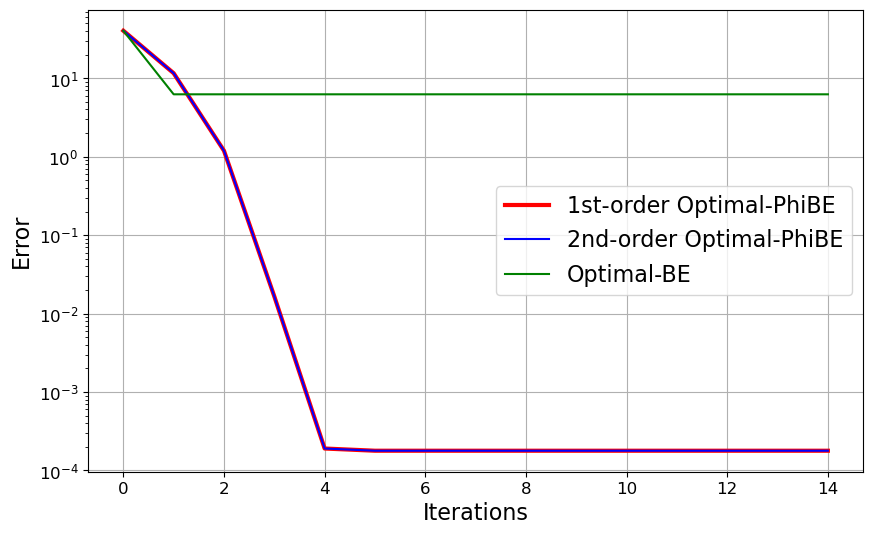

In [92]:
x_tensor = torch.arange(15)
w_tensor = torch.tensor(V_exact_dist_phibe_1[:15], dtype=torch.float64)
y_tensor = torch.tensor(V_exact_dist_phibe_2[:15], dtype=torch.float64)
v_tensor = torch.tensor(V_exact_dist_RL[:15], dtype=torch.float64)
x_values = x_tensor.numpy()
w_values = w_tensor.numpy()
y_values = y_tensor.numpy()
v_values = v_tensor.numpy()
plt.figure(figsize=(10, 6))
plt.xticks(fontsize=12)  
plt.yticks(fontsize=12)
plt.semilogy(x_values, w_values, label='1st-order Optimal-PhiBE', color='red', linewidth=3)
plt.semilogy(x_values, y_values, label='2nd-order Optimal-PhiBE', color='blue')
plt.semilogy(x_values, v_values, label='Optimal-BE', color='green')
# plt.title('Error during the iteration (measured by policy)', fontsize=16)
plt.xlabel('Iterations', fontsize=16)
plt.ylabel('Error', fontsize=16)
plt.grid(True)
plt.legend(fontsize=16)
plt.savefig("LQR/2d_d/1.eps", format='eps')
plt.show()

In [93]:
beta = 0.
sig = 0.
A = torch.tensor([[-1.8750, -0.6250], [-0.6250, -1.8750]])
B = torch.tensor([[0.6, 0.2], [0.2, 0.6]])
Q = torch.tensor([[10., 2.], [2., 10.4]])
R = torch.tensor([[12., 3.], [3., 8.]])

In [94]:
true_b, true_c, True_V = LQR_2D_true_solution(A, B, sig, Q, R, beta)
b_init = true_b + torch.randn(2, 2)
c_init = 2. * torch.rand(2, 1) - 1.
Q_init = 4. * torch.rand(10) - 2.
V_init = true_V_eval_2D(A, B, b_init, R, Q, beta, sig)

In [95]:
print(true_b)
print(true_c)
print(True_V)
print(V_init)

tensor([[-0.1335,  0.0258],
        [ 0.0115, -0.2110]])
tensor([[0.],
        [0.]])
tensor([ 0.0000, -2.8184,  0.8011, -2.7454])
tensor([ 0.0000, -4.3147, -1.7800, -4.3403])


In [96]:
bd_low_s = -2
bd_upper_s = 2
bd_low_b = -2
bd_upper_b = 2
reward = reward
bases_V = bases_poly_2D_simp
d_bases_V = d_bases_poly_2D_simp
sec_d_bases_V = sec_d_bases_poly_2D_simp
bases_Q = bases_poly_2D_s_a_simp
num_iter = 15
GD_num_iter = 75
m=int(1e4)
m_Q=int(1e4)
I=6
I_Q=6
lr=0.1
order = 1
true_V = True_V
info_true = {"A":A, "B":B, "sig":sig, "R":R, "Q":Q}
dt = 1
simp_basis = True
deterministic = True
b_val_phibe_1, V_exact_dist_phibe_1, V = phibe_finder_2D_LQR(beta, b_init, Q_init, bd_low_s, bd_upper_s, bd_low_b, bd_upper_b, reward, simp_basis, bases_V, d_bases_V, sec_d_bases_V, bases_Q, num_iter, deterministic, "Galerkin", GD_num_iter, m, m_Q, I, lr, dt, order, true_V, info_true)

Running Optimal Phibe of order 1 using Galerkin: 100%|██████████| 15/15 [00:02<00:00,  5.09it/s]


In [97]:
bd_low_s = -2
bd_upper_s = 2
bd_low_b = -2
bd_upper_b = 2
reward = reward
bases_V = bases_poly_2D_simp
d_bases_V = d_bases_poly_2D_simp
sec_d_bases_V = sec_d_bases_poly_2D_simp
bases_Q = bases_poly_2D_s_a_simp
num_iter = 15
GD_num_iter = 75
m=int(1e4)
m_Q=int(1e4)
I=6
I_Q=6
lr=0.1
order = 2
true_V = True_V
info_true = {"A":A, "B":B, "sig":sig, "R":R, "Q":Q}
dt = 1
simp_basis = True
deterministic = True
b_val_phibe_2, V_exact_dist_phibe_2, V = phibe_finder_2D_LQR(beta, b_init, Q_init, bd_low_s, bd_upper_s, bd_low_b, bd_upper_b, reward, simp_basis, bases_V, d_bases_V, sec_d_bases_V, bases_Q, num_iter, deterministic, "Galerkin", GD_num_iter, m, m_Q, I, lr, dt, order, true_V, info_true)

Running Optimal Phibe of order 2 using Galerkin: 100%|██████████| 15/15 [00:02<00:00,  5.22it/s]


In [98]:
bd_low_s = -2
bd_upper_s = 2
bd_low_a = -2
bd_upper_a = 2
reward = reward
bases_Q = bases_poly_2D_s_a_simp
num_iter = 15
GD_num_iter = 75
m=int(1e4)
m_Q=int(1e4)
I=6
I_Q=6
true_V = True_V
info_true = {"A":A, "B":B, "sig":sig, "R":R, "Q":Q}
dt = 1
simple_basis = True
b_val_RL, V_exact_dist_RL = RL_finder_2D_LQR(beta, b_init, bd_low_s, bd_upper_s, bd_low_a, bd_upper_a, reward, simple_basis, bases_Q, num_iter, I, m_Q, dt, true_V, info_true)

Running Optimal BE PI: 100%|██████████| 15/15 [00:02<00:00,  5.12it/s]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


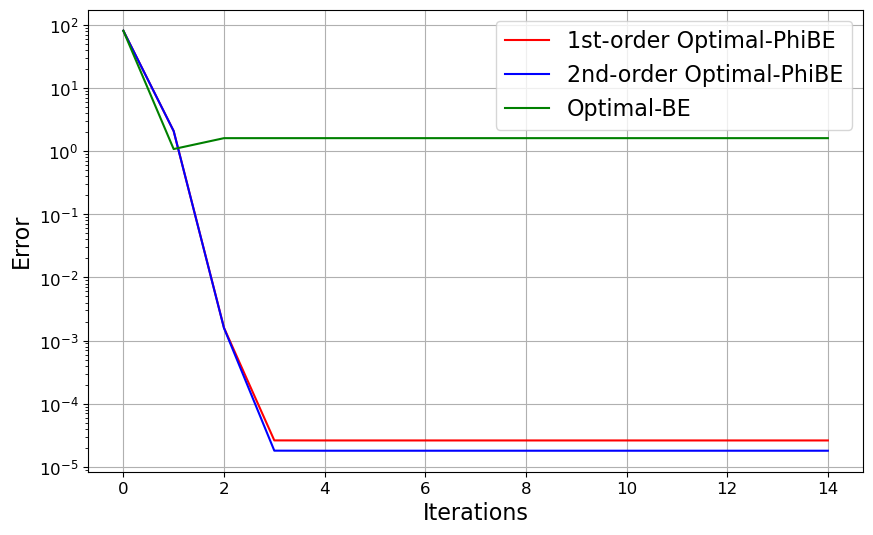

In [99]:
x_tensor = torch.arange(15)
w_tensor = torch.tensor(V_exact_dist_phibe_1[:15], dtype=torch.float64)
y_tensor = torch.tensor(V_exact_dist_phibe_2[:15], dtype=torch.float64)
v_tensor = torch.tensor(V_exact_dist_RL[:15], dtype=torch.float64)
x_values = x_tensor.numpy()
w_values = w_tensor.numpy()
y_values = y_tensor.numpy()
v_values = v_tensor.numpy()
plt.figure(figsize=(10, 6))
plt.xticks(fontsize=12) 
plt.yticks(fontsize=12)
plt.semilogy(x_values, w_values, label='1st-order Optimal-PhiBE', color='red')
plt.semilogy(x_values, y_values, label='2nd-order Optimal-PhiBE', color='blue')
plt.semilogy(x_values, v_values, label='Optimal-BE', color='green')
# plt.title('Error during the iteration (measured by policy)', fontsize=16)
plt.xlabel('Iterations', fontsize=16)
plt.ylabel('Error', fontsize=16)
plt.grid(True)
plt.legend(fontsize=16)
plt.savefig("LQR/2d_d/2.eps", format='eps')
plt.show()

In [11]:
beta = 0.
sig = 0.
A = torch.tensor([[-9.3750, -3.1250], [-3.1250, -9.3750]])
B = torch.tensor([[1., 0.1], [0.1, 1.01]])
Q = torch.tensor([[106.6667, -93.3333], [-93.3333, 106.6667]])
R = torch.tensor([[9., 8.5], [8.5, 9.]])

In [12]:
true_b, true_c, True_V = LQR_2D_true_solution(A, B, sig, Q, R, beta)
b_init = true_b + torch.randn(2, 2)
c_init = 2. * torch.rand(2, 1) - 1.
Q_init = 4. * torch.rand(10) - 2.
V_init = true_V_eval_2D(A, B, b_init, R, Q, beta, sig)

In [102]:
print(true_b)
print(true_c)
print(True_V)
print(V_init)

tensor([[-7.1405,  7.1100],
        [ 7.1091, -7.1458]])
tensor([[0.],
        [0.]])
tensor([ 0.0000, -4.2022,  7.3419, -4.2047])
tensor([ 0.0000, -7.9854,  1.3728, -6.6104])


In [103]:
bd_low_s = -5
bd_upper_s = 5
bd_low_b = -10
bd_upper_b = 10
reward = reward
bases_V = bases_poly_2D_simp
d_bases_V = d_bases_poly_2D_simp
sec_d_bases_V = sec_d_bases_poly_2D_simp
bases_Q = bases_poly_2D_s_a_simp
num_iter = 15
GD_num_iter = 75
m=int(1e4)
m_Q=int(1e4)
I=6
I_Q=6
lr=0.1
order = 1
true_V = True_V
info_true = {"A":A, "B":B, "sig":sig, "R":R, "Q":Q}
dt = 0.1
simp_basis = True
deterministic = True
b_val_phibe_1, V_exact_dist_phibe_1, V = phibe_finder_2D_LQR(beta, b_init, Q_init, bd_low_s, bd_upper_s, bd_low_b, bd_upper_b, reward, simp_basis, bases_V, d_bases_V, sec_d_bases_V, bases_Q, num_iter, deterministic, "Galerkin", GD_num_iter, m, m_Q, I, lr, dt, order, true_V, info_true)

Running Optimal Phibe of order 1 using Galerkin: 100%|██████████| 15/15 [00:02<00:00,  5.30it/s]


In [104]:
bd_low_s = -5
bd_upper_s = 5
bd_low_b = -10
bd_upper_b = 10
reward = reward
bases_V = bases_poly_2D_simp
d_bases_V = d_bases_poly_2D_simp
sec_d_bases_V = sec_d_bases_poly_2D_simp
bases_Q = bases_poly_2D_s_a_simp
num_iter = 15
GD_num_iter = 75
m=int(1e4)
m_Q=int(1e4)
I=6
I_Q=6
lr=0.1
order = 2
true_V = True_V
info_true = {"A":A, "B":B, "sig":sig, "R":R, "Q":Q}
dt = 0.1
simp_basis = True
deterministic = True
b_val_phibe_2, V_exact_dist_phibe_2, V = phibe_finder_2D_LQR(beta, b_init, Q_init, bd_low_s, bd_upper_s, bd_low_b, bd_upper_b, reward, simp_basis, bases_V, d_bases_V, sec_d_bases_V, bases_Q, num_iter, deterministic, "Galerkin", GD_num_iter, m, m_Q, I, lr, dt, order, true_V, info_true)

Running Optimal Phibe of order 2 using Galerkin: 100%|██████████| 15/15 [00:02<00:00,  5.06it/s]


In [105]:
bd_low_s = -5
bd_upper_s = 5
bd_low_a = -10
bd_upper_a = 10
reward = reward
bases_Q = bases_poly_2D_s_a_simp
num_iter = 15
GD_num_iter = 75
m=int(1e4)
m_Q=int(1e4)
I=6
I_Q=6
true_V = True_V
info_true = {"A":A, "B":B, "sig":sig, "R":R, "Q":Q}
dt = 0.1
simple_basis = True
b_val_RL, V_exact_dist_RL = RL_finder_2D_LQR(beta, b_init, bd_low_s, bd_upper_s, bd_low_a, bd_upper_a, reward, simple_basis, bases_Q, num_iter, I, m_Q, dt, true_V, info_true)

Running Optimal BE PI: 100%|██████████| 15/15 [00:02<00:00,  5.36it/s]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


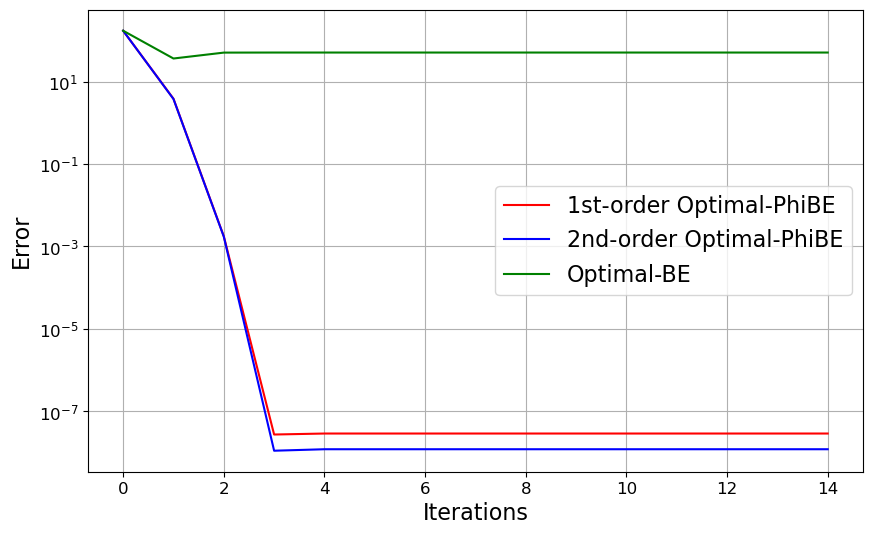

In [106]:
x_tensor = torch.arange(15)
w_tensor = torch.tensor(V_exact_dist_phibe_1[:15], dtype=torch.float64)
y_tensor = torch.tensor(V_exact_dist_phibe_2[:15], dtype=torch.float64)
v_tensor = torch.tensor(V_exact_dist_RL[:15], dtype=torch.float64)
x_values = x_tensor.numpy()
w_values = w_tensor.numpy()
y_values = y_tensor.numpy()
v_values = v_tensor.numpy()
plt.figure(figsize=(10, 6))
plt.xticks(fontsize=12) 
plt.yticks(fontsize=12)
plt.semilogy(x_values, w_values, label='1st-order Optimal-PhiBE', color='red')
plt.semilogy(x_values, y_values, label='2nd-order Optimal-PhiBE', color='blue')
plt.semilogy(x_values, v_values, label='Optimal-BE', color='green')
# plt.title('Error during the iteration (measured by policy)', fontsize=16)
plt.xlabel('Iterations', fontsize=16)
plt.ylabel('Error', fontsize=16)
plt.grid(True)
plt.legend(fontsize=16)
plt.savefig("LQR/2d_d/3.eps", format='eps')
plt.show()

In [4]:
beta = 0.
sig = 0.
A = torch.tensor([[10.6667, -9.3333], [-9.3333, 10.6667]])
B = torch.tensor([[0.9000, 0.8500], [0.8500, 0.8800]])
Q = torch.tensor([[12.,  3.], [ 3.,  8.]])
R = torch.tensor([[10.0000,  2.0000], [ 2.0000, 10.4000]])

In [5]:
true_b, true_c, True_V = LQR_2D_true_solution(A, B, sig, Q, R, beta)
b_init = true_b + 100 * torch.randn(2, 2)
Q_init = 4. * torch.rand(10) - 2.
V_init = true_V_eval_2D(A, B, b_init, R, Q, beta, sig)

In [6]:
print(true_b)
print(true_c)
print(True_V)
print(V_init)

tensor([[-559.7795,  558.8276],
        [ 409.0873, -411.9288]])
tensor([[0.],
        [0.]])
tensor([     0.0000, -99273.6599, 198104.5098, -98860.0412])
tensor([      0.0000, -105616.7636,  208000.1107, -102950.4049])


In [7]:
bd_low_s = -500
bd_upper_s = 500
bd_low_b = -600
bd_upper_b = 600
reward = reward
bases_V = bases_poly_2D_simp
d_bases_V = d_bases_poly_2D_simp
sec_d_bases_V = sec_d_bases_poly_2D_simp
bases_Q = bases_poly_2D_s_a_simp
num_iter = 15
GD_num_iter = 75
m=int(1e4)
m_Q=int(1e4)
I=6
I_Q=6
lr=0.1
order = 1
true_V = True_V
info_true = {"A":A, "B":B, "sig":sig, "R":R, "Q":Q}
dt = 0.01
simp_basis = True
deterministic = True
b_val_phibe_1, V_exact_dist_phibe_1, V = phibe_finder_2D_LQR(beta, b_init, Q_init, bd_low_s, bd_upper_s, bd_low_b, bd_upper_b, reward, simp_basis, bases_V, d_bases_V, sec_d_bases_V, bases_Q, num_iter, deterministic, "Galerkin", GD_num_iter, m, m_Q, I, lr, dt, order, true_V, info_true)

Running Optimal Phibe of order 1 using Galerkin: 100%|██████████| 15/15 [00:02<00:00,  5.54it/s]


In [8]:
bd_low_s = -500
bd_upper_s = 500
bd_low_b = -600
bd_upper_b = 600
reward = reward
bases_V = bases_poly_2D_simp
d_bases_V = d_bases_poly_2D_simp
sec_d_bases_V = sec_d_bases_poly_2D_simp
bases_Q = bases_poly_2D_s_a_simp
num_iter = 15
GD_num_iter = 75
m=int(1e4)
m_Q=int(1e4)
I=6
I_Q=6
lr=0.1
order = 2
true_V = True_V
info_true = {"A":A, "B":B, "sig":sig, "R":R, "Q":Q}
dt = 0.01
simp_basis = True
deterministic = True
b_val_phibe_2, V_exact_dist_phibe_2, V = phibe_finder_2D_LQR(beta, b_init, Q_init, bd_low_s, bd_upper_s, bd_low_b, bd_upper_b, reward, simp_basis, bases_V, d_bases_V, sec_d_bases_V, bases_Q, num_iter, deterministic, "Galerkin", GD_num_iter, m, m_Q, I, lr, dt, order, true_V, info_true)

Running Optimal Phibe of order 2 using Galerkin: 100%|██████████| 15/15 [00:02<00:00,  5.78it/s]


In [9]:
bd_low_s = -500
bd_upper_s = 500
bd_low_a = -600
bd_upper_a = 600
reward = reward
bases_Q = bases_poly_2D_s_a_simp
num_iter = 15
GD_num_iter = 75
m=int(1e4)
m_Q=int(1e4)
I=6
I_Q=6
true_V = True_V
info_true = {"A":A, "B":B, "sig":sig, "R":R, "Q":Q}
dt = 0.01
simple_basis = True
b_val_RL_4, V_exact_dist_RL = RL_finder_2D_LQR(beta, b_init, bd_low_s, bd_upper_s, bd_low_a, bd_upper_a, reward, simple_basis, bases_Q, num_iter, I, m_Q, dt, true_V, info_true)

Running Optimal BE PI: 100%|██████████| 15/15 [00:02<00:00,  5.93it/s]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


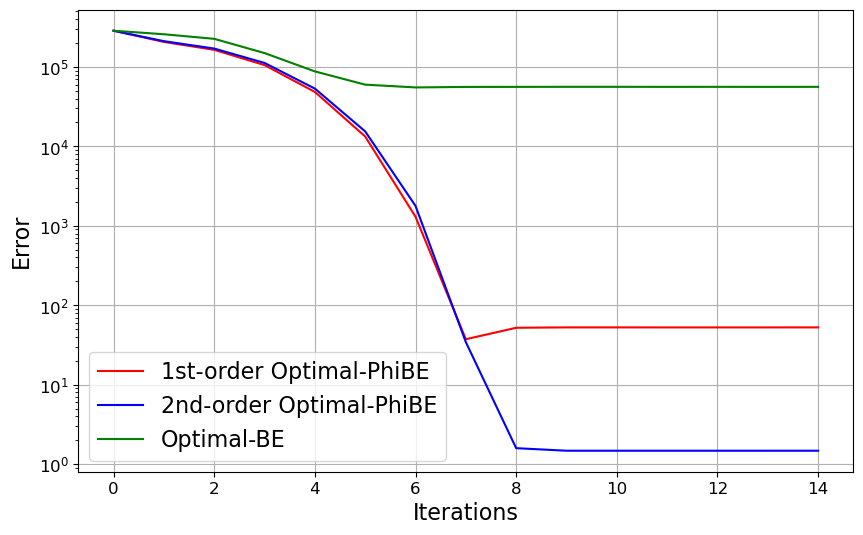

In [10]:
x_tensor = torch.arange(15)
w_tensor = torch.tensor(V_exact_dist_phibe_1[:15], dtype=torch.float64)
y_tensor = torch.tensor(V_exact_dist_phibe_2[:15], dtype=torch.float64)
v_tensor = torch.tensor(V_exact_dist_RL[:15], dtype=torch.float64)
x_values = x_tensor.numpy()
w_values = w_tensor.numpy()
y_values = y_tensor.numpy()
v_values = v_tensor.numpy()
plt.figure(figsize=(10, 6))
plt.xticks(fontsize=12) 
plt.yticks(fontsize=12)
plt.semilogy(x_values, w_values, label='1st-order Optimal-PhiBE', color='red')
plt.semilogy(x_values, y_values, label='2nd-order Optimal-PhiBE', color='blue')
plt.semilogy(x_values, v_values, label='Optimal-BE', color='green')
# plt.title('Error during the iteration (measured by policy)', fontsize=16)
plt.xlabel('Iterations', fontsize=16)
plt.ylabel('Error', fontsize=16)
plt.grid(True)
plt.legend(fontsize=16)
plt.savefig("LQR/2d_d/4.eps", format='eps')
plt.show()